In [1]:
cd nanoGPT

/Users/ibrahim/Desktop/NYU_ML_FINAL_PROJECT/nanoGPT


In [2]:
ls

__pycache__/              out-rnn-1m/               out-scaling-xl copy/
assets/                   out-rnn-20m/              out-shakespeare-char/
bench.py                  out-rnn-40m/              prepare.py
CompleteModel.ipynb       out-rnn-50m/              README.md
config/                   out-rnn-5m/               RNN.ipynb
configurator.py           out-scaling-double/       sample.py
data/                     out-scaling-Final/        scaling_laws.ipynb
LICENSE                   out-scaling-large/        train_rnn.py
Mac_Results/              out-scaling-medium/       train.py
model_rnn.py              out-scaling-small/        transformer_sizing.ipynb
model.py                  out-scaling-tiny/
out-rnn-10m/              out-scaling-xl/


In [3]:
cd data

/Users/ibrahim/Desktop/NYU_ML_FINAL_PROJECT/nanoGPT/data


In [4]:
cd music_abc

/Users/ibrahim/Desktop/NYU_ML_FINAL_PROJECT/nanoGPT/data/music_abc


In [5]:
!python create_subset.py

Reading from train_scaling.txt...
Dones


In [7]:
cd ..

/Users/ibrahim/Desktop/NYU_ML_FINAL_PROJECT/nanoGPT/data


[290.47891567   0.59699764   0.46197402]


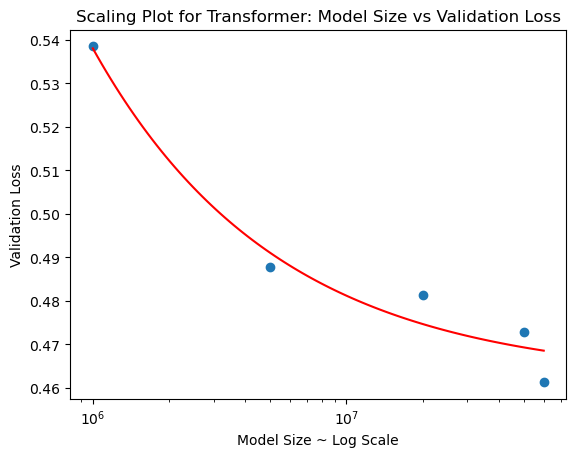

In [8]:
# Imports are just from Prior Project in Classes 
import numpy as np

import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from scipy import stats
from scipy.special import expit as logistic
from scipy.special import softmax
from scipy.optimize import curve_fit


# 
# Tiny 1M
# step 6000: train loss 0.3576, val loss 0.5385
# saving checkpoint to out-scaling-tiny
# iter 6000: loss 0.3445, time 901.82ms, mfu 7.05%

# Small 5M
# step 6000: train loss 0.3359, val loss 0.4877
# saving checkpoint to out-scaling-small
# iter 6000: loss 0.2949, time 1276.72ms, mfu 15.42%

# Medium 20M
# step 6000: train loss 0.3079, val loss 0.4813
# saving checkpoint to out-scaling-medium
# iter 6000: loss 0.3352, time 1927.38ms, mfu 22.44%
    
# Large 50M
# step 6000: train loss 0.3083, val loss 0.4729
# saving checkpoint to out-scaling-large
# iter 6000: loss 0.3286, time 2942.75ms, mfu 27.67%


# XL 60M
# step 6000: train loss 0.3027, val loss 0.4613
# saving checkpoint to out-scaling-xl
# iter 6000: loss 0.2451, time 3544.59ms, mfu 25.73%





P = [1000000, 5000000, 20000000, 50000000, 60000000]
Params = np.array(P)
LP = np.array(Params)

V = [0.5385,0.4877,0.4813, 0.4729, 0.4613]
Val = np.array(V)

def scaling(N, a, alpha, c):
    return a * N**(-alpha) + c

# params, _ = curve_fit(scaling, Params, Val) Initial
# New Line to add Bounds
params, _ = curve_fit(scaling, Params, Val, p0=[10.0, 0.5, 0.47], bounds=([0, 0, 0], [np.inf, 2, 1]), maxfev=1000000)

a, alpha, c = params

print(params)


plt.title("Scaling Plot for Transformer: Model Size vs Validation Loss") 
plt.xlabel("Model Size ~ Log Scale")
plt.ylabel("Validation Loss")
plt.plot(LP, (Val), 'o')


plt.xscale('log')


N_smooth = np.logspace(np.log10(Params.min()), np.log10(Params.max()), 100)
fitted_curve = scaling(N_smooth, a, alpha, c)
plt.plot(N_smooth, fitted_curve, 'r-', label=f'Fit: {a:.2f} * N^(-{alpha:.3f}) + {c:.4f}')



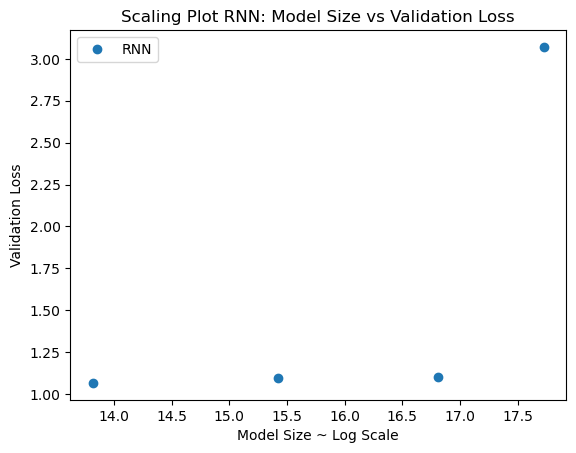

In [9]:
# RNN
# 1M
# step 6000: val loss 1.0662
# saving checkpoint to out-rnn-1m
# iter 6000: loss 0.2918, time 397.71ms

# 5M
# step 6000: val loss 1.0945
# saving checkpoint to out-rnn-5m
# iter 6000: loss 0.2551, time 735.10ms

# 20M
# step 6000: val loss 1.0992
# saving checkpoint to out-rnn-20m
# iter 6000: loss 0.3643, time 1257.10ms

# 50M
# step 6000: val loss 3.0710
# saving checkpoint to out-rnn-50m
# iter 6000: loss 3.1066, time 2099.11ms


P = [1000000, 5000000, 20000000, 50000000]
Params = np.array(P)
LP = np.log(Params)
V = [1.0662, 1.0945, 1.0992, 3.0710]
Val = np.array(V)

plt.title("Scaling Plot RNN: Model Size vs Validation Loss") 
plt.xlabel("Model Size ~ Log Scale")
plt.ylabel("Validation Loss")
plt.plot(LP, Val, 'o', label='RNN')

plt.legend()

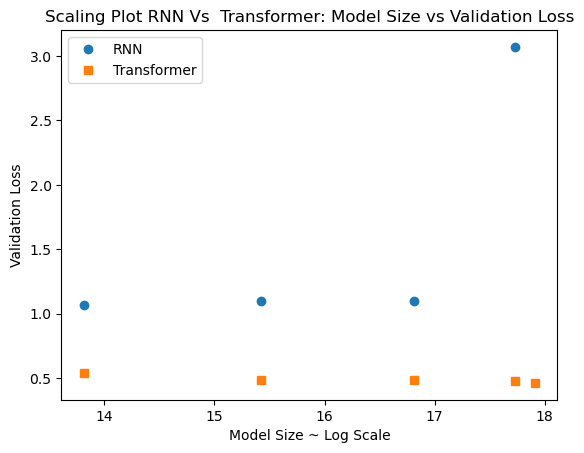

In [10]:
TP = [1000000, 5000000, 20000000, 50000000, 60000000]
Params = np.array(TP)
TLP = np.log(Params)

TV = [0.5385,0.4877,0.4813, 0.4729, 0.4613]
TVal = np.array(TV)


P = [1000000, 5000000, 20000000, 50000000]
Params = np.array(P)
LP = np.log(Params)
V = [1.0662, 1.0945, 1.0992, 3.0710]
Val = np.array(V)


plt.title("Scaling Plot RNN Vs  Transformer: Model Size vs Validation Loss") 
plt.xlabel("Model Size ~ Log Scale")
plt.ylabel("Validation Loss")
plt.plot(LP, Val, 'o', label='RNN')
plt.plot(TLP, TVal, 's', label='Transformer') 
plt.legend()

In [11]:
ls

music_abc/        openwebtext/      shakespeare/      shakespeare_char/


In [15]:
cd music_abc

/Users/ibrahim/Desktop/NYU_ML_FINAL_PROJECT/nanoGPT/data/music_abc


In [16]:
!python create_subset.py

Reading from train_scaling.txt...
Dones


In [17]:
!python create_subset_final.py

Reading from train_scaling.txt...
Dones
